### Import TensorFlow and other libraries

In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
base_dir = "/content/drive/MyDrive/ORBIT TOMAT"
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/ORBIT TOMAT/training')
#test_dir = os.path.join(base_dir, '/content/drive/MyDrive/plant_recognation1/data_uji')
valid_dir = os.path.join(base_dir, '/content/drive/MyDrive/ORBIT TOMAT/valid')

### Image preparation for CNN Image Classifier

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
valid_datagen = ImageDataGenerator( rescale = 1.0/255 )
#valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ORBIT TOMAT/training',
target_size = (200, 200), batch_size = 100, class_mode = 'binary')
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/ORBIT TOMAT/valid',target_size = (200, 200), batch_size = 100, class_mode = 'binary')


Found 3535 images belonging to 2 classes.
Found 884 images belonging to 2 classes.


In [ ]:
#train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150, 150))

#validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=20, class_mode='binary', target_size=(150, 150))

#test_generator = test_datagen.flow_from_directory(test_dir, batch_size=0, class_mode='binary', target_size=(150, 150))

### Visualize the data

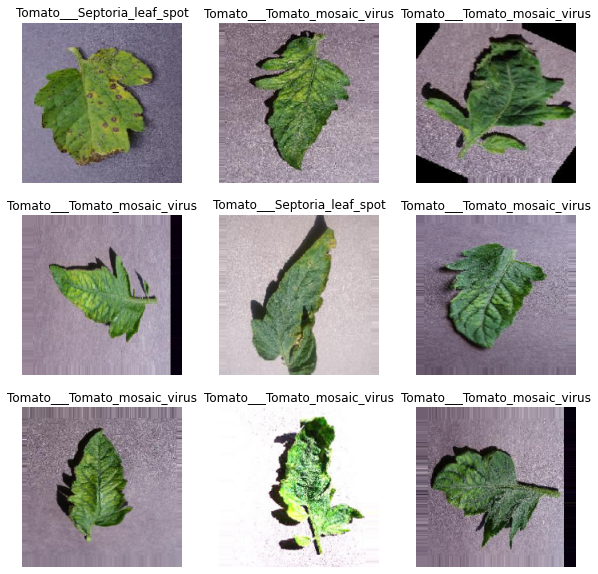

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = training_set.next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Tomato___Septoria_leaf_spot")
    else:
        plt.title("Tomato___Tomato_mosaic_virus")
    plt.axis("off")

## Model architecture

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# layer kedua
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
# layer ketiga
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
# layer keempat
tf.keras.layers.MaxPooling2D(2, 2),
# layer kelima
tf.keras.layers.MaxPooling2D(2, 2),
#Lakukan Flatten
tf.keras.layers.Flatten(),

# connected layer
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## Visualizing network architectures

In [ ]:
tf.keras.utils.pydot = pydot

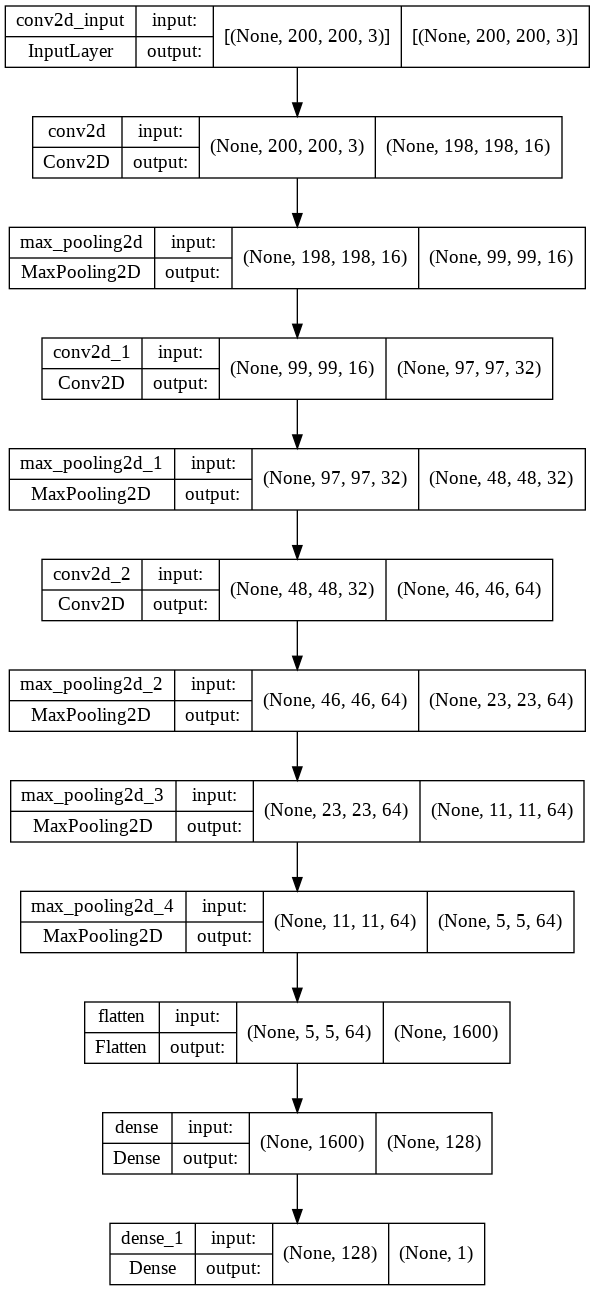

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

#### Model summary

View all the layers of the network using the model's summary method:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

#### Compile and train the model

In [ ]:
model.compile(
    #optimizer = tf.optimizers.RMSprop(learning_rate=0.0001), # RMSProp
    optimizer = tf.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
%%time

history = model.fit(
    training_set,
    # steps_per_epoch=8, # steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
    epochs=50,
    validation_data = valid_set,
    # validation_steps=2, # validation_steps = TotalvalidationSamples / ValidationBatchSize
    verbose=1
)


Epoch 1/50
36/36 [==============================] - 468s 13s/step - loss: 0.5244 - accuracy: 0.7465 - val_loss: 0.4458 - val_accuracy: 0.8111
Epoch 2/50
36/36 [==============================] - 40s 1s/step - loss: 0.2602 - accuracy: 0.8982 - val_loss: 0.3107 - val_accuracy: 0.8699
Epoch 3/50
36/36 [==============================] - 40s 1s/step - loss: 0.1913 - accuracy: 0.9324 - val_loss: 0.1824 - val_accuracy: 0.9265
Epoch 4/50
36/36 [==============================] - 42s 1s/step - loss: 0.1681 - accuracy: 0.9369 - val_loss: 0.2976 - val_accuracy: 0.8812
Epoch 5/50
36/36 [==============================] - 42s 1s/step - loss: 0.1242 - accuracy: 0.9553 - val_loss: 0.1046 - val_accuracy: 0.9672
Epoch 6/50
36/36 [==============================] - 42s 1s/step - loss: 0.1069 - accuracy: 0.9621 - val_loss: 0.1860 - val_accuracy: 0.9265
Epoch 7/50
36/36 [==============================] - 42s 1s/step - loss: 0.0834 - accuracy: 0.9720 - val_loss: 0.1674 - val_accuracy: 0.9389
Epoch 8/50
36/36 [

#### Visualize training results

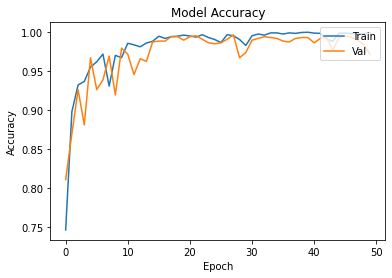

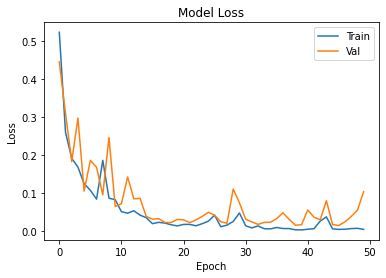

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Evaluate the model on the test data via evaluate():

In [ ]:
test_loss, test_acc = model.evaluate(valid_set)

9/9 [==============================] - 3s 289ms/step - loss: 0.1034 - accuracy: 0.9717


In [ ]:
valid_set.class_indices

{'Tomato___Septoria_leaf_spot': 0, 'Tomato___Tomato_mosaic_virus': 1}

In [ ]:
model.save('tomat_detection.h5')

#### Predict on new data

Saving 1170f108-86a3-4bc6-8a06-c82e55178f91___PSU_CG 2327_90deg.JPG to 1170f108-86a3-4bc6-8a06-c82e55178f91___PSU_CG 2327_90deg.JPG
[1.]
1170f108-86a3-4bc6-8a06-c82e55178f91___PSU_CG 2327_90deg.JPG ini adalah Tomato___Tomato_mosaic_virus 


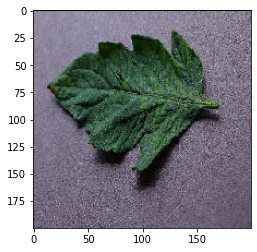

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " ini adalah Tomato___Septoria_leaf_spot")
  else:
    print(fn + " ini adalah Tomato___Tomato_mosaic_virus ")